# Importing the numpy and pandas library

In [1]:
import numpy as np
import pandas as pd


# Loading the Data excel file

In [2]:
data = pd.read_excel("C:\\Users\\ASUD\\Downloads\\data.xlsx")

In [3]:
data.shape

(21, 4)

# Loading the time-span,concentration of A ,B,C

In [4]:
t_span = np.array(data.iloc[:,0])
Ca=np.array(data.iloc[:,1])
Cb=np.array(data.iloc[:,2])
Cc=np.array(data.iloc[:,3])

In [5]:
t_span

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [6]:
Ca

array([1.        , 0.74080857, 0.54877057, 0.40657779, 0.30118162,
       0.22314199, 0.16529744, 0.12246697, 0.09072015, 0.06721352,
       0.04978992, 0.03688878, 0.02732619, 0.02024566, 0.01499743,
       0.01111142, 0.00823103, 0.00609828, 0.00451744, 0.00334695,
       0.00247949])

In [7]:
Cb

array([0.        , 0.08639714, 0.15040981, 0.1978074 , 0.23293946,
       0.25895267, 0.27823419, 0.29251101, 0.30309328, 0.31092883,
       0.31673669, 0.32103707, 0.3242246 , 0.32658478, 0.32833419,
       0.32962953, 0.33058966, 0.33130057, 0.33182752, 0.33221768,
       0.33250684])

In [8]:
Cc

array([0.        , 0.17279428, 0.30081962, 0.39561481, 0.46587892,
       0.51790534, 0.55646837, 0.58502202, 0.60618656, 0.62185766,
       0.63347339, 0.64207415, 0.64844921, 0.65316956, 0.65666838,
       0.65925905, 0.66117931, 0.66260115, 0.66365504, 0.66443536,
       0.66501367])

# Defining the Odes function

In [9]:
def odes(t,y,*K):
    dydt=np.zeros(3)
    Ca=y[0]
    Cb=y[1]
    Cc=y[2]
    k1=K[0]
    k2=K[1]
    dydt[0]=-(k1*Ca + k2*Ca)
    dydt[1]=k1*Ca
    dydt[2]=k2*Ca
    return (dydt)

# Importing the library

In [10]:
from scipy.optimize import minimize
import math
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Defining the objective function for finding the rmse

In [11]:
def object_func(K):
    y0 = [1,0,0]
    t_span = np.array([0,1])
    t_point= np.linspace(0,1,21)
    
    soln = solve_ivp(odes,t_span,y0,t_eval=t_point, args=(K))
    y= soln.y.T
    
    sum1=0
    sum2=0
    sum3=0
  
    for i in np.linspace(0,1,21):
        i=int(i)
        sum1=sum1+((Ca[i])-(y[i,0]))**2
        sum2=sum2+((Cb[i])-(y[i,1]))**2
        sum3=sum3+((Cc[i])-(y[i,2]))**2
        
    rmse1=((math.sqrt((sum1)))/20)
    rmse2=((math.sqrt((sum2)))/20)
    rmse3=((math.sqrt((sum3)))/20)
    rmse=(rmse1+rmse2+rmse3)/3
    return (rmse)



# Minimizing the objective function by estimating K1 & K2  by  using Powell method

In [12]:
K0=[0.1,2]
soln1= minimize(object_func, K0, method='Powell')


# value of K1 & K2

In [13]:
K=soln1.x
K

array([1.99974275, 3.9994855 ])

# Solving Odes function by  solve_ivp solver

In [14]:
K=soln1.x

y0 = [1,0,0]
t_span = np.array([0,1])
t_point= np.linspace(0,1,21)

soln = solve_ivp(odes,t_span,y0,t_eval=t_point,args=(K))
y= soln.y.T

# Plotting the graph between time and concentraion of A,B,C

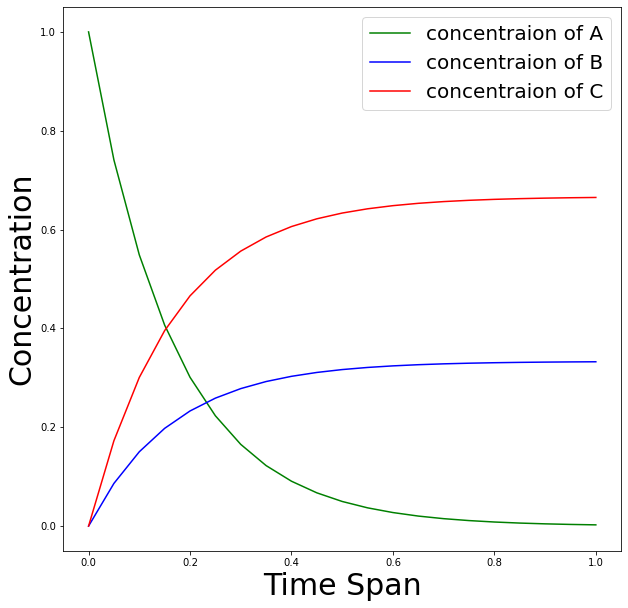

In [15]:
t=soln.t
A=soln.y[0]
B=soln.y[1]
C=soln.y[2]

plt.figure(figsize=(10,10))
plt.plot(t,A,label='concentraion of A',color='green')
plt.plot(t,B,label='concentraion of B',color='blue')
plt.plot(t,C,label='concentraion of C',color='red')
plt.xlabel('Time Span',fontsize=30)
plt.ylabel('Concentration',fontsize=30)
plt.legend(fontsize=20)
plt.show()